In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,5)

# Data loading and exploring

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", low_memory=False,encoding="latin-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 135)

In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
# Renaming some of the required features for analysis
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                          'region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed',
                          'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                          'weaptype1_txt':'Weapon_type','target1':'Target','city':'City'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
#Two ways to check numeric data 
#1. Using built-in .describe() function
df.describe()

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#2. Using .select_types() 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

77

In [9]:
# Checking for duplicate values
df.duplicated().sum()

0

In [10]:
# Missing values
df.isnull().sum().sort_values(ascending = False)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
suicide                  0
success                  0
crit3                    0
property                 0
eventid                  0
Length: 135, dtype: int64

In [11]:
# Missing values in percentage
missing_percentage = df.isnull().sum().sort_values(ascending = False) /len(df) * 100
missing_percentage

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
                      ...    
suicide              0.000000
success              0.000000
crit3                0.000000
property             0.000000
eventid              0.000000
Length: 135, dtype: float64

In [12]:
# percentage of missing values in our dataset
total_missing_percentage = (((df.isnull().sum()).sum())/df.size)*100
total_missing_percentage

56.481718962414206

* More than 50% values are Null, we need to clean the dataset first

In [13]:
# creating dataframe with necessary columns only
df = df[['Year','Month','Day','Country','State','Region','City','Attack_Type','Killed',
              'Wounded','Group','Target','Target_Type','Weapon_type']]
df.head(10)

,Year,Month,Day,Country,State,Region,City,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


In [14]:
df.columns.values

array(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Attack_Type', 'Killed', 'Wounded', 'Group', 'Target',
       'Target_Type', 'Weapon_type'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Attack_Type  181691 non-null  object 
 8   Killed       171378 non-null  float64
 9   Wounded      165380 non-null  float64
 10  Group        181691 non-null  object 
 11  Target       181055 non-null  object 
 12  Target_Type  181691 non-null  object 
 13  Weapon_type  181691 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


In [16]:
df.isnull().sum().sort_values(ascending=False)

Wounded        16311
Killed         10313
Target           636
City             434
State            421
Year               0
Month              0
Day                0
Country            0
Region             0
Attack_Type        0
Group              0
Target_Type        0
Weapon_type        0
dtype: int64

In [17]:
#Function to barplot along with percentage 
def barplot_values_percent(ax):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+0.05 #adjust the numbers (higher numbers = to the right, lower = to the left)
        height = i.get_height()+0.1 #adjust the numbers (higher numbers = up, lower = down)
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=10,color='black')

# 1. MOST ATTACKED COUNTRIES

In [18]:
df.Country.value_counts().sort_values(ascending=False)[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

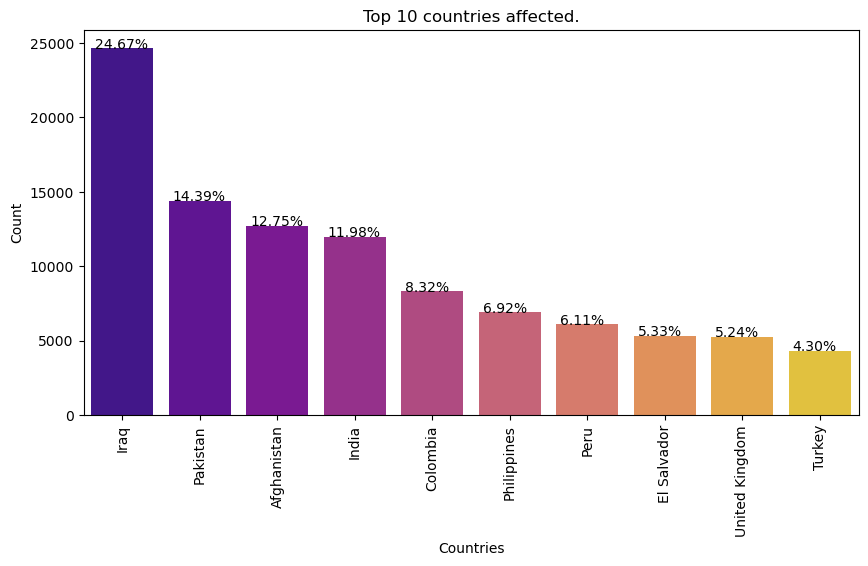

In [19]:
p1 = sns.barplot(x=df.Country.value_counts().sort_values(ascending=False)[:10].index,y=df.Country.value_counts().sort_values(ascending=False)[:10].values,palette='plasma')
plt.title("Top 10 countries affected.")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=90)
barplot_values_percent(p1)
plt.show()

### Iraq is the most affected country by terrorism.

# 2. MOST TARGETED PLACES

In [20]:
df.Target_Type.value_counts().sort_values(ascending=False)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_Type, dtype: int64

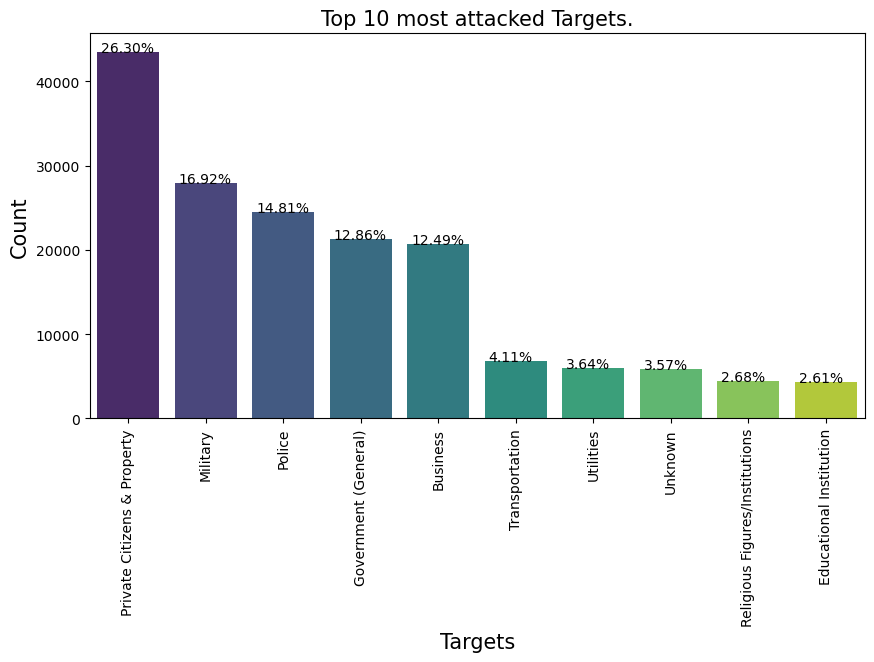

In [21]:
p2 = sns.barplot(x=df.Target_Type.value_counts().sort_values(ascending=False)[:10].index,y=df.Target_Type.value_counts().sort_values(ascending=False)[:10].values,palette='viridis')
plt.title("Top 10 most attacked Targets.",fontsize=15)
plt.xlabel("Targets",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
barplot_values_percent(p2)
plt.show()

* The most Attacked Target is 'Private Citizens & Property' which is approximately 26%
* 10-20% is the Target which is 'Military','Police', 'Government', 'Business'

# 3. MOST ATTACKED REGIONS

In [22]:
df.columns.values

array(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Attack_Type', 'Killed', 'Wounded', 'Group', 'Target',
       'Target_Type', 'Weapon_type'], dtype=object)

In [23]:
df.State.value_counts().sort_values(ascending=False)[:20]

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Name: State, dtype: int64

In [24]:
df.Region.value_counts().sort_values(ascending=False)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

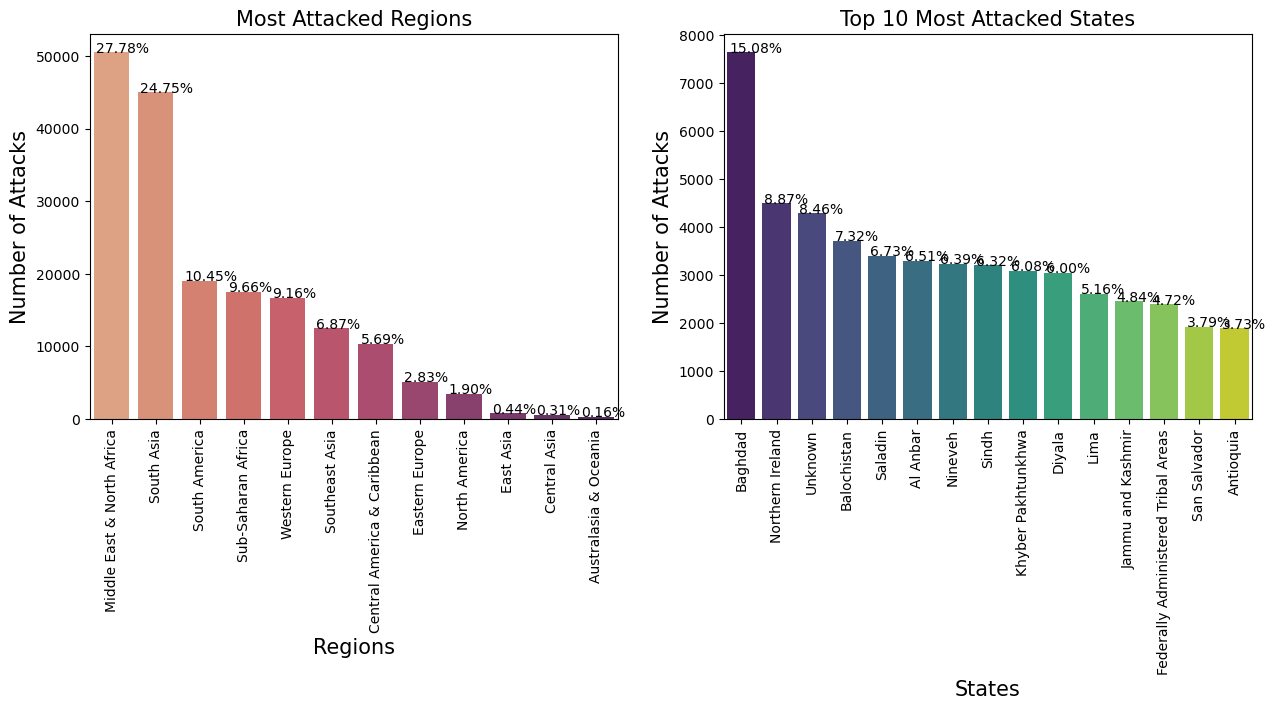

In [25]:
plt.subplot(1,2,1)
# regions with most attacks 
p4 = sns.barplot(x=df['Region'].value_counts().index, y=df['Region'].value_counts().values,palette='flare')
plt.title('Most Attacked Regions',fontsize=15)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
barplot_values_percent(p4)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
p5 = sns.barplot(x=df['State'].value_counts().head(15).index, y=df['State'].value_counts().head(15).values,palette='viridis')
plt.title('Top 10 Most Attacked States',fontsize=15)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
barplot_values_percent(p5)
plt.gcf().set_size_inches(15, 5)

* Most Attacked Region is 'Middle East and North Africa' then comes South Asia
* Most Attacked States is 'Baghdad'

# 4. NUMBER OF TERRORIST ATTACKS PER YEAR

In [26]:
df.Year.value_counts().sort_values(ascending=False)[:10]

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

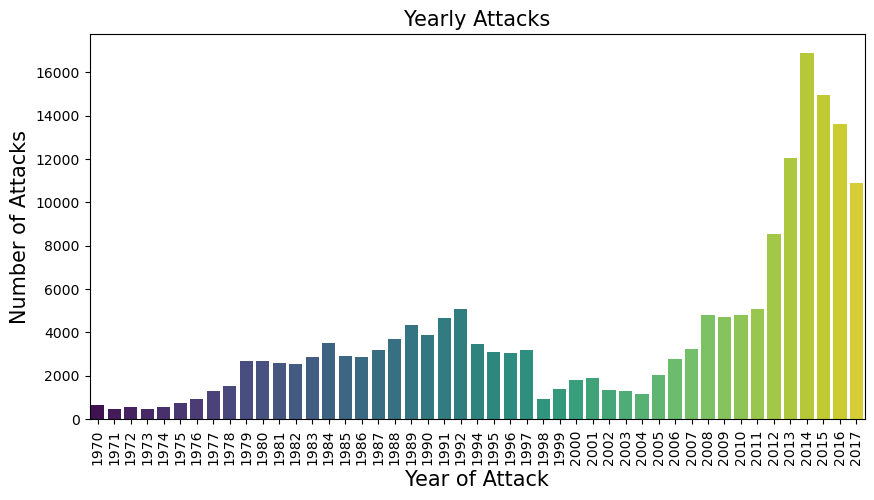

In [27]:
g1 = sns.barplot(x=df.Year.value_counts().index, y=df.Year.value_counts().values,palette='viridis')
plt.title('Yearly Attacks',fontsize=15)
plt.xlabel('Year of Attack',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
# plt.figure(figsize = (12,7))
plt.show()

2014 appears to be witness of a huge terrorist attacks.

# 5.MOST USED WEAPONS

In [28]:
df.Weapon_type.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

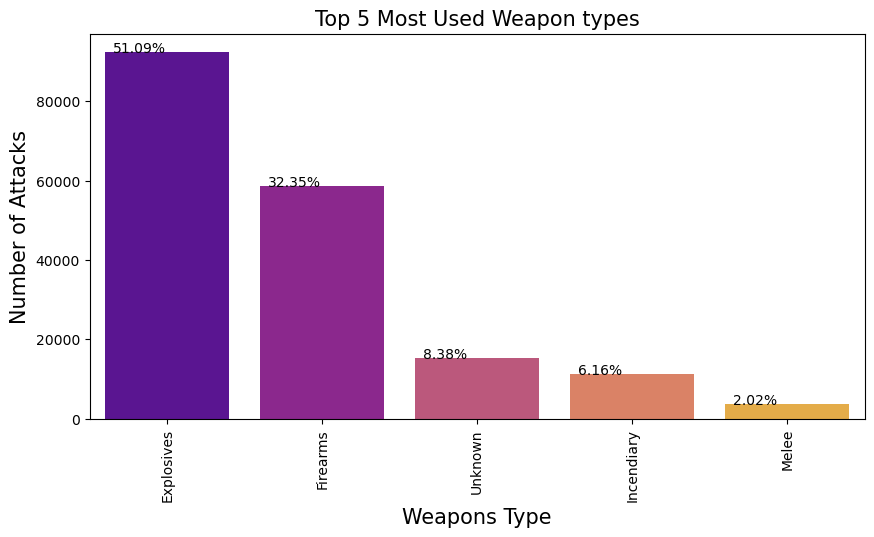

In [29]:
p6 = sns.barplot(x=df.Weapon_type.value_counts()[:5].index, y=df.Weapon_type.value_counts()[:5].values,palette='plasma')
plt.title('Top 5 Most Used Weapon types',fontsize=15)
plt.xlabel('Weapons Type',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
barplot_values_percent(p6)
plt.xticks(rotation=90)
plt.show()

Almost 50% of Weapon used is 'Explosives' whereas 32% 'Firearms' used in the terrorism

# 6. Terrorist Organizations

In [30]:
df.Group.value_counts()[1:11]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

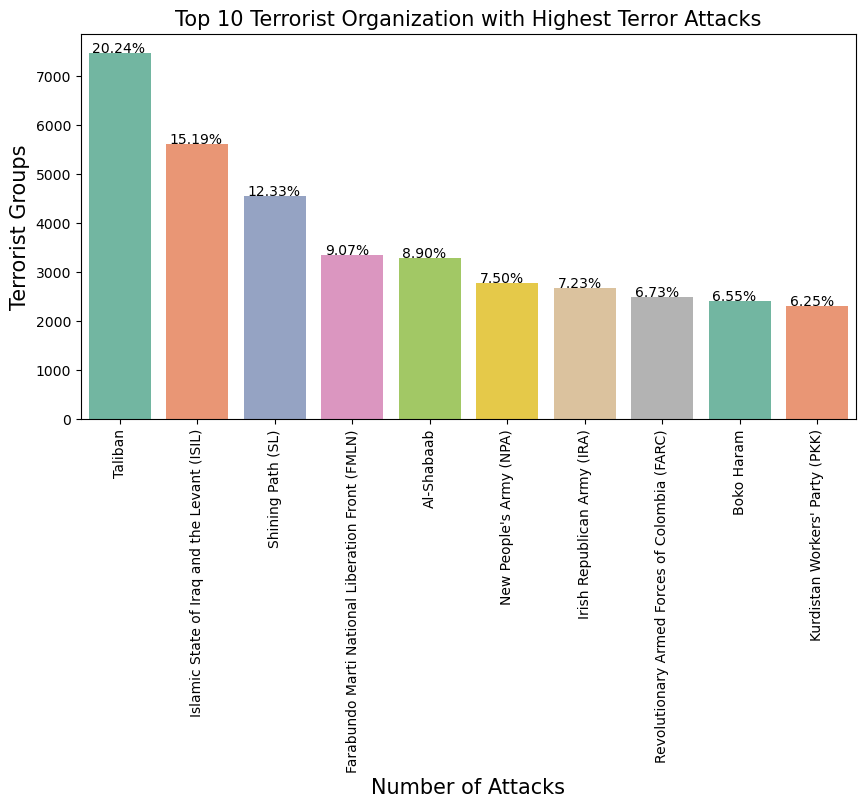

In [31]:
g = sns.barplot(x = df.Group.value_counts()[1:11].index,y=df.Group.value_counts()[1:11].values,palette="Set2")
plt.title('Top 10 Terrorist Organization with Highest Terror Attacks',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.xticks(rotation=90)
barplot_values_percent(g)
plt.show()

In [32]:
df_taliban =df[df.Group == 'Taliban']

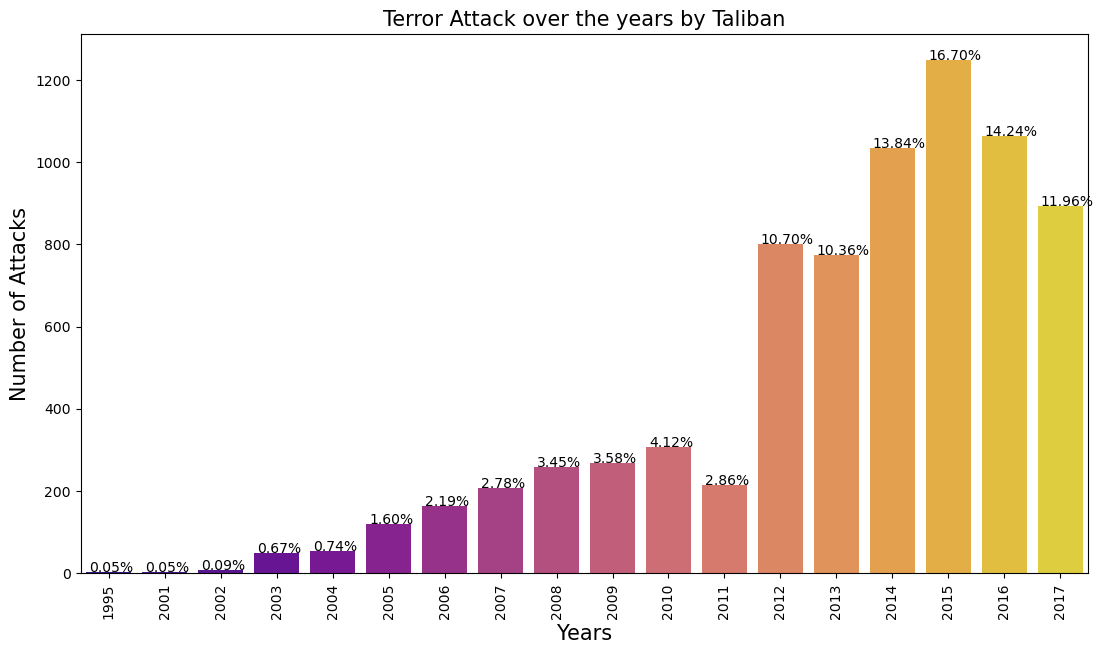

In [33]:
# Terror Attacks by Taliban over the Years
plt.figure(figsize = (13,7))
g3 = sns.barplot(x=df_taliban['Year'].value_counts().index,y=df_taliban['Year'].value_counts().values, palette = 'plasma')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
barplot_values_percent(g3)
plt.xticks(rotation= 90)
plt.show()

# Conclusion

* Iraq was affected most by terror attacks.
* Private Citizens & Property are the most targeted places.
* Middle East and North Africa was the most affected region
* Global terror attack deaths rose sharply starting year 2011
* 2014 was the most attacked year.
* The State and City that was most affected was Baghdad
* Explosives have been consistently the most popular weapon of choice for terrorist attack.
* Taliban attacked the most and in year 2015.